In [122]:
import numpy as np
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
import scipy.stats as stats
%matplotlib inline

In [123]:
df=pd.read_csv('Mcdonald+.CSV')
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


In [126]:
# Q1 - Plot graphically which food categories have the highest and lowest varieties.
# Ans - As per following Pia plot the “Coffee & Tea” has highest numbers of Varieties and “Salads” contributing lowest number of Varieties.
df['Category'].value_counts()


Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

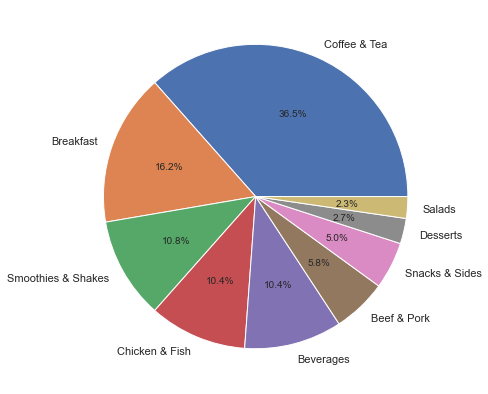

In [127]:
plt.figure(figsize=(10,7))
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%');


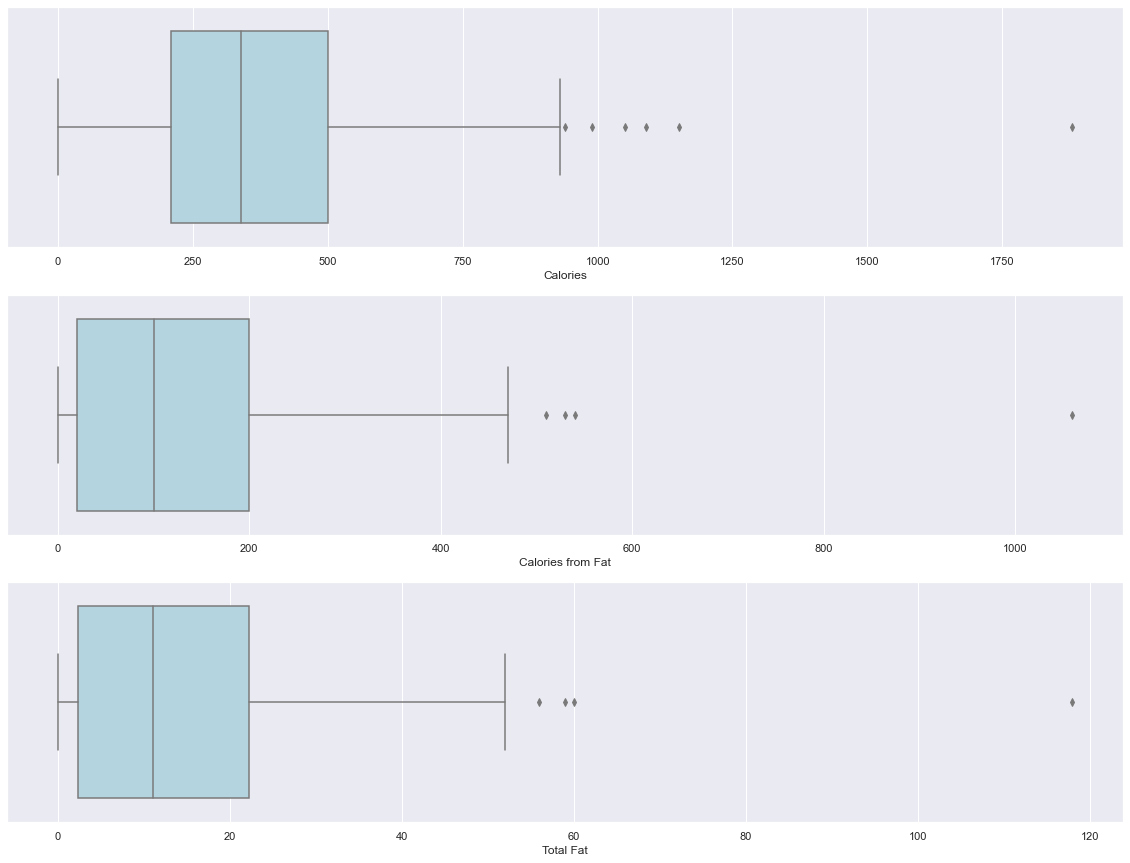

In [128]:
# Q-2 Which all variables have an outlier?

# Ans - # As per above visualization, the below variables have
# Calories , Calories from Fat , Total Fat , Cholesterol ,Trans Fat,Sodium,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value,Vitamin C (% Daily Value, Calcium (% Daily Value),Iron (% Daily Value),Carbohydrates,Total,Cholesterol (% Daily Value), Fat (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value)

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Calories'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Calories from Fat'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Total Fat'], color='lightblue')


plt.show()

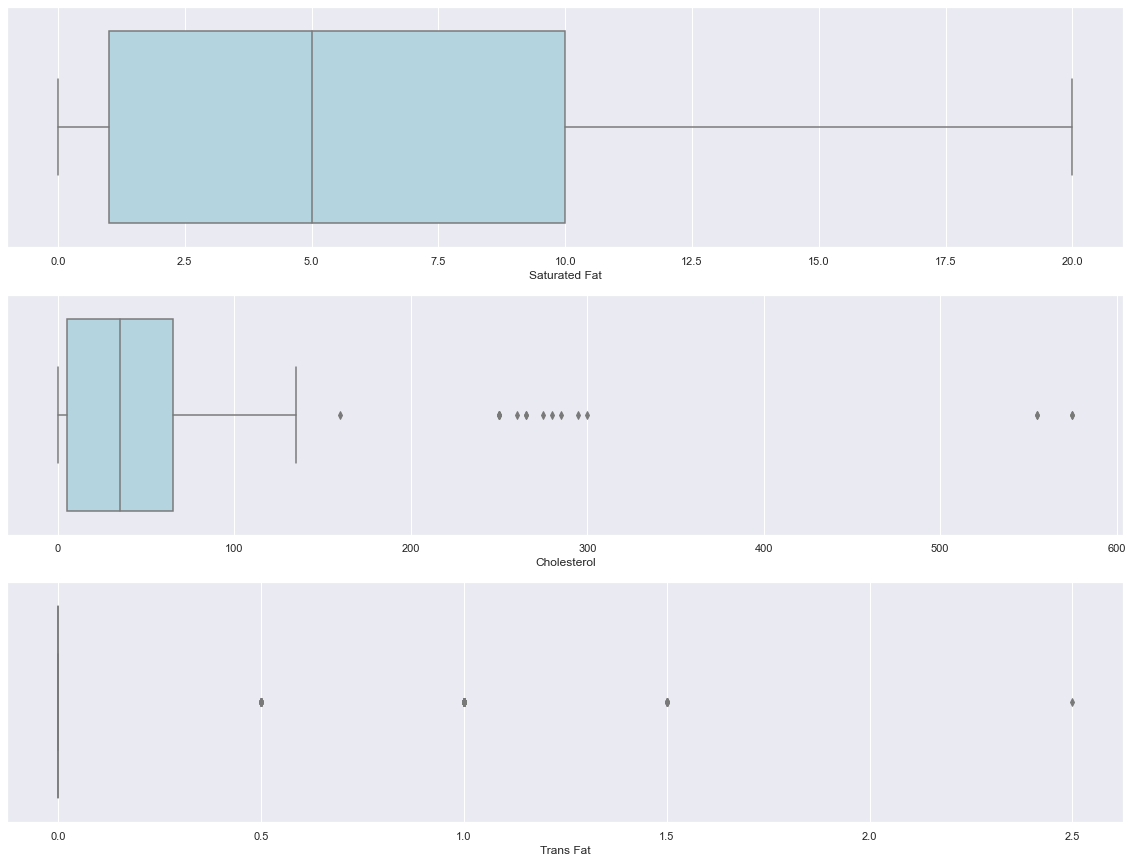

In [90]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Saturated Fat'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Cholesterol'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Trans Fat'], color='lightblue')

plt.show()

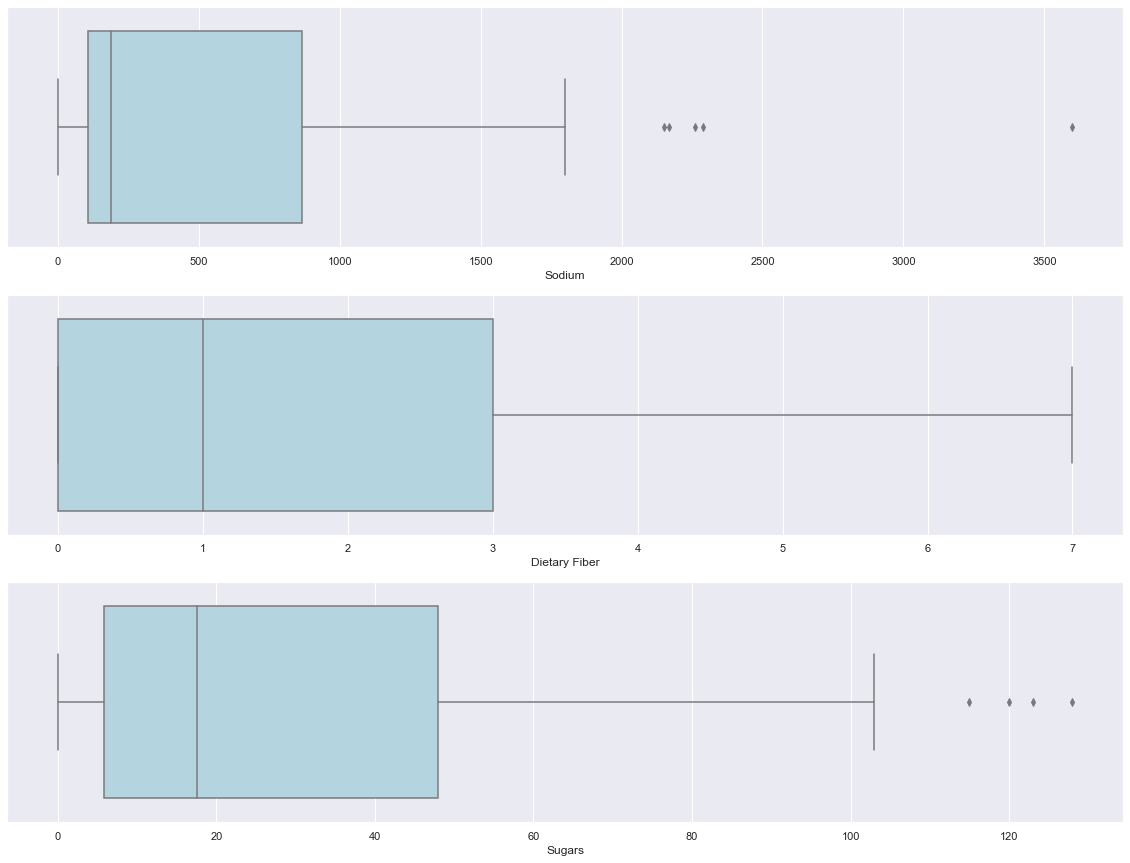

In [92]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Sodium'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Dietary Fiber'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Sugars'], color='lightblue')


plt.show()

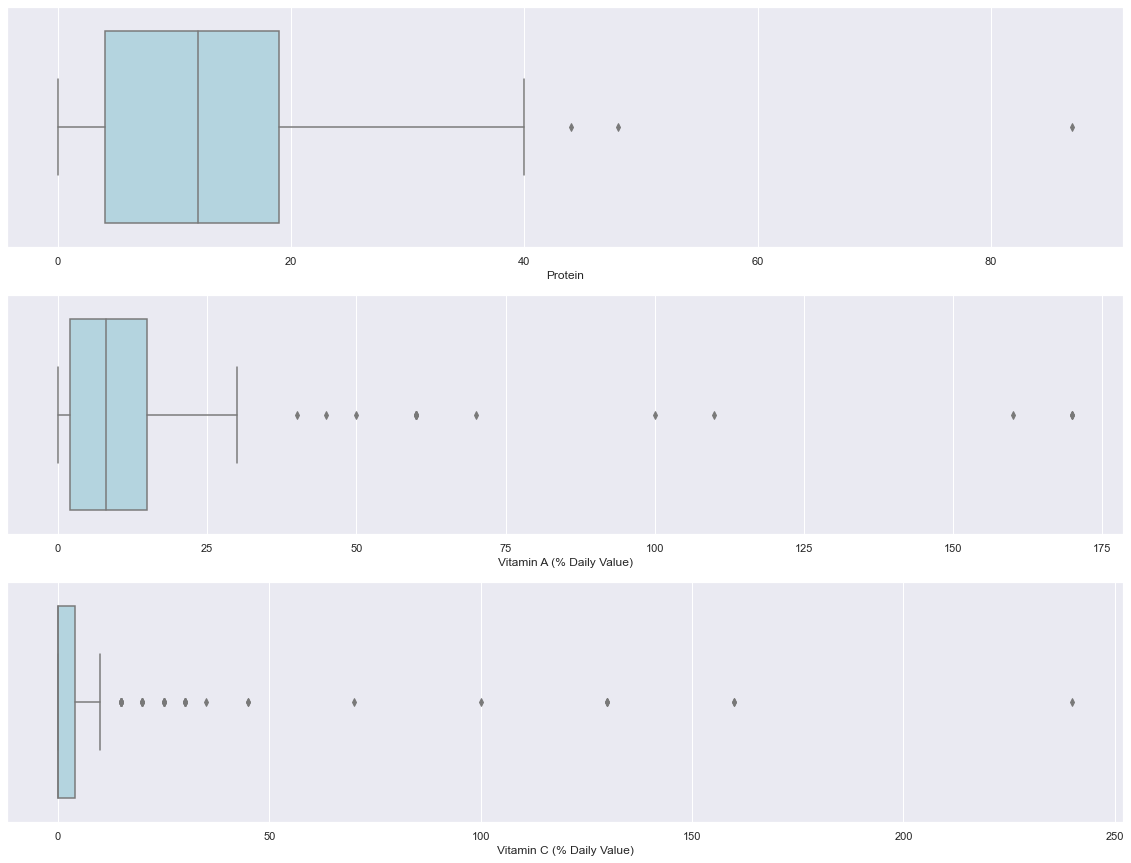

In [93]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Protein'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Vitamin A (% Daily Value)'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Vitamin C (% Daily Value)'], color='lightblue')


plt.show()

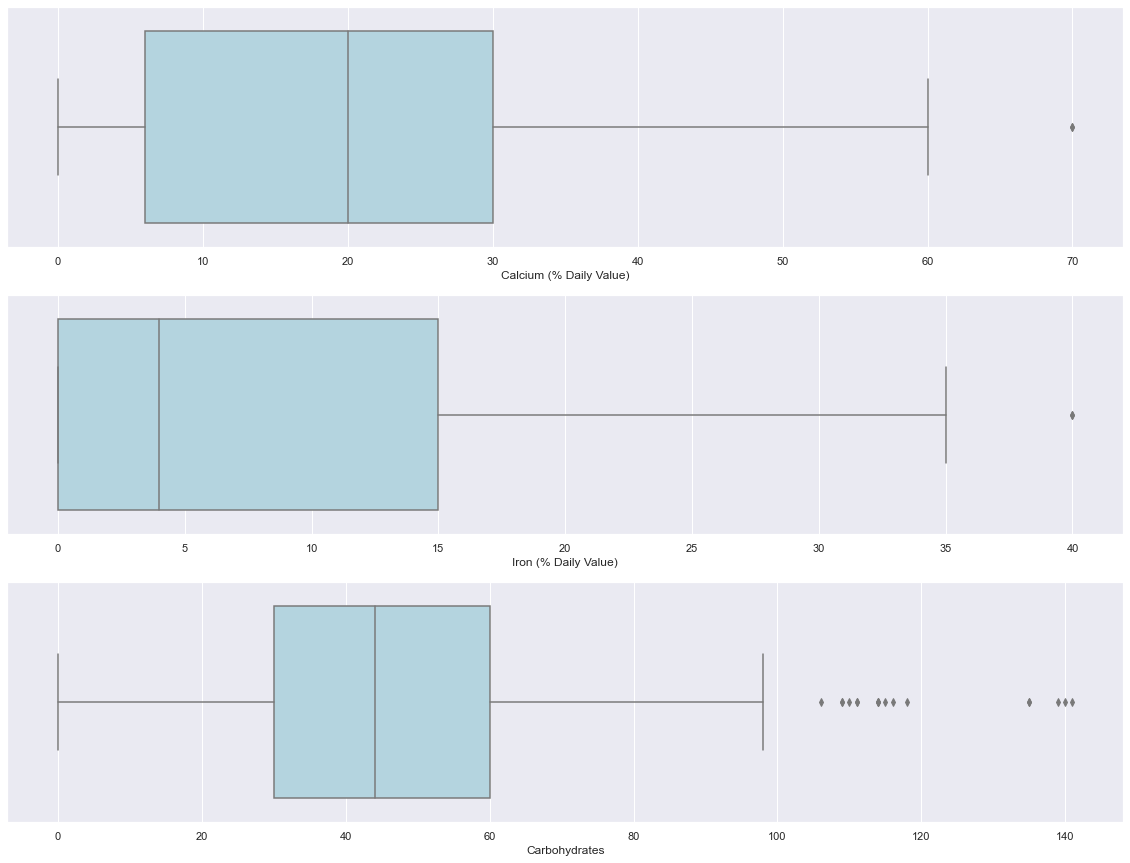

In [94]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Calcium (% Daily Value)'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Iron (% Daily Value)'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Carbohydrates'], color='lightblue')


plt.show()

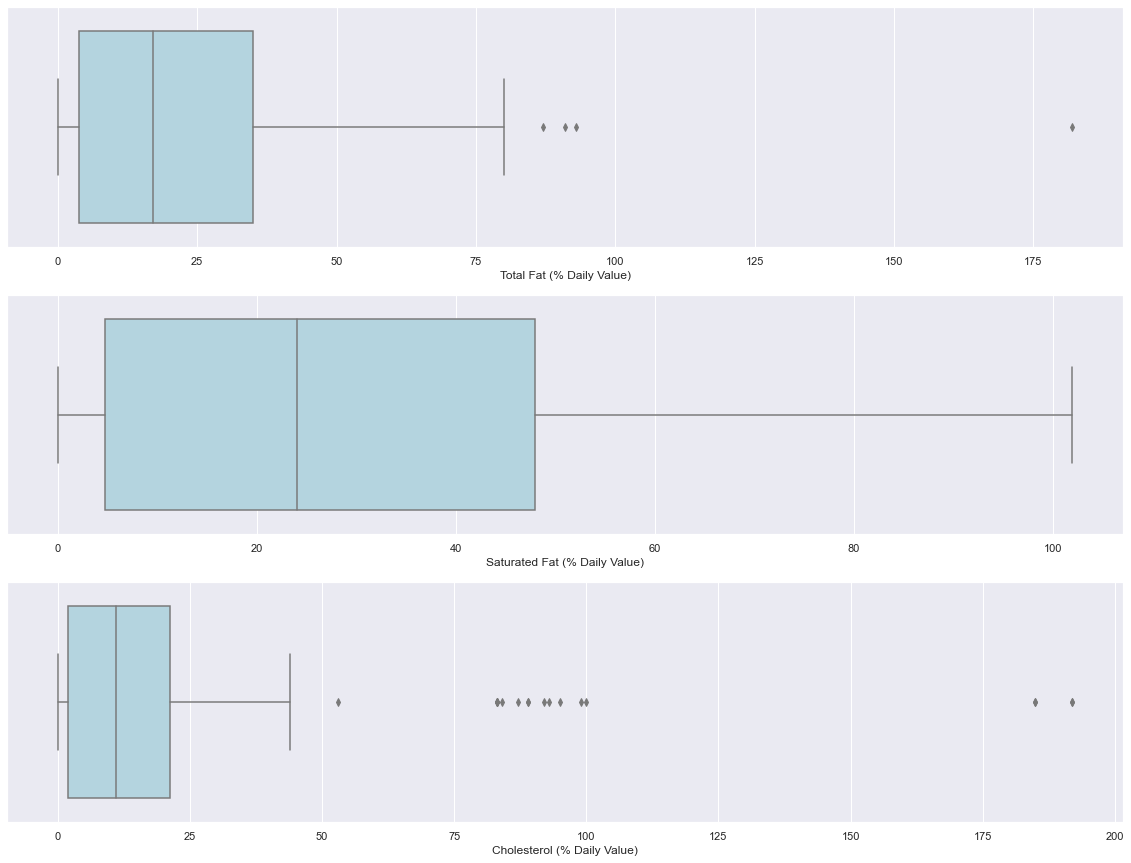

In [95]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Total Fat (% Daily Value)'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Saturated Fat (% Daily Value)'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Cholesterol (% Daily Value)'], color='lightblue')


plt.show()

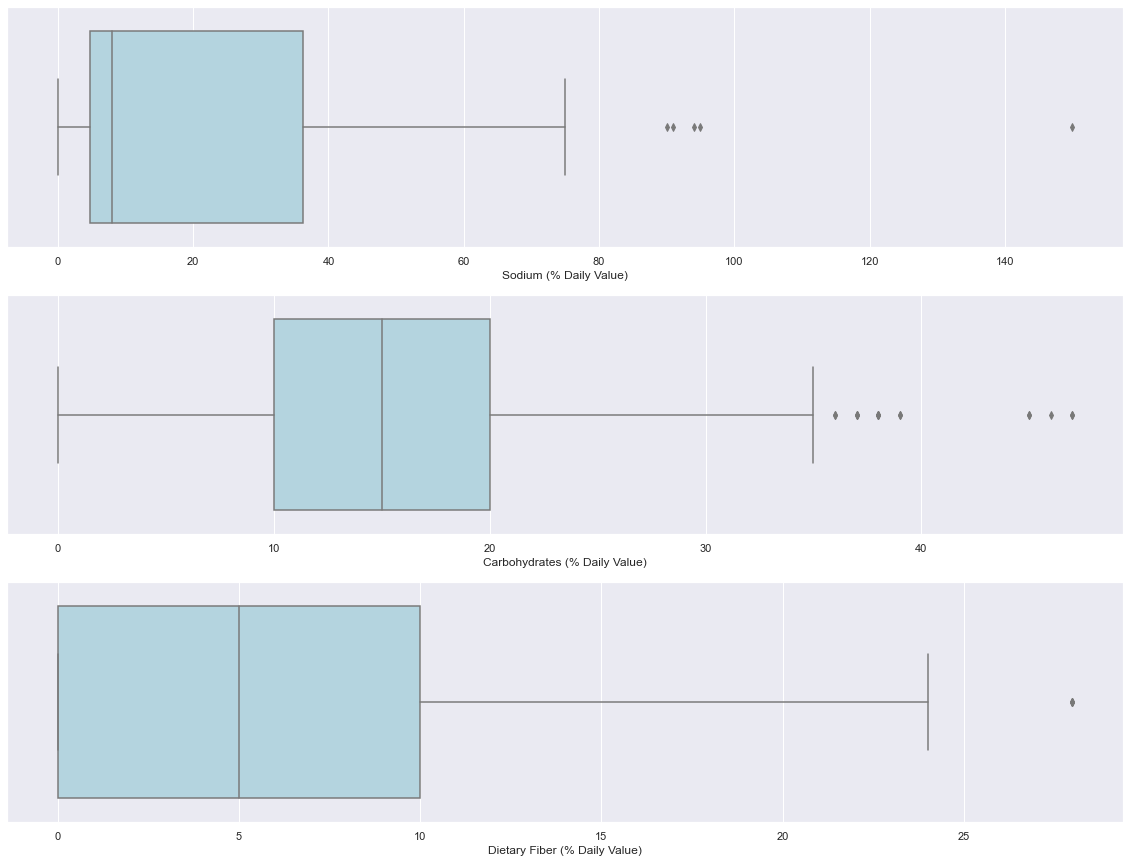

In [97]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df['Sodium (% Daily Value)'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df['Carbohydrates (% Daily Value)'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['Dietary Fiber (% Daily Value)'], color='lightblue')


plt.show()

In [129]:
# Q3 Which variables have the highest correlation? Plot them and find out the value?

In [81]:
df.corr()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Calories,1.000000,0.904588,0.904409,0.904123,0.845564,0.847631,0.522441,0.596399,0.595208,0.712309,...,0.781539,0.781242,0.538894,0.540014,0.259598,0.787847,0.108844,-0.068747,0.428426,0.643552
Calories from Fat,0.904588,1.000000,0.999663,0.999725,0.847008,0.849592,0.433686,0.682161,0.681607,0.846624,...,0.461672,0.461463,0.581274,0.575621,-0.115285,0.807913,0.056731,-0.087331,0.161034,0.735894
Total Fat,0.904409,0.999663,1.000000,0.999765,0.846707,0.849293,0.431453,0.680547,0.680000,0.846158,...,0.461213,0.461005,0.580837,0.575206,-0.115446,0.807773,0.054434,-0.089354,0.162860,0.734685
Total Fat (% Daily Value),0.904123,0.999725,0.999765,1.000000,0.847379,0.849973,0.433016,0.680940,0.680378,0.846728,...,0.460516,0.460298,0.580592,0.575033,-0.115761,0.807922,0.054038,-0.089353,0.162031,0.735478
Saturated Fat,0.845564,0.847008,0.846707,0.847379,1.000000,0.999279,0.620611,0.631210,0.630334,0.584075,...,0.591261,0.591743,0.351818,0.347152,0.197734,0.603028,0.064972,-0.179672,0.403311,0.578062
Saturated Fat (% Daily Value),0.847631,0.849592,0.849293,0.849973,0.999279,1.000000,0.620210,0.633603,0.632712,0.588694,...,0.591322,0.591655,0.356831,0.351797,0.195928,0.606581,0.065376,-0.178059,0.401139,0.580488
Trans Fat,0.522441,0.433686,0.431453,0.433016,0.620611,0.620210,1.000000,0.253935,0.251502,0.187580,...,0.463250,0.462891,0.054918,0.058301,0.334756,0.388249,0.075833,-0.076612,0.385331,0.325476
Cholesterol,0.596399,0.682161,0.680547,0.680940,0.631210,0.633603,0.253935,1.000000,0.999855,0.624362,...,0.270977,0.272662,0.435575,0.440266,-0.135518,0.561561,0.080239,-0.082978,0.132077,0.655000
Cholesterol (% Daily Value),0.595208,0.681607,0.680000,0.680378,0.630334,0.632712,0.251502,0.999855,1.000000,0.623320,...,0.269300,0.270992,0.434940,0.439814,-0.136459,0.560957,0.080059,-0.083315,0.132382,0.653167
Sodium,0.712309,0.846624,0.846158,0.846728,0.584075,0.588694,0.187580,0.624362,0.623320,1.000000,...,0.200796,0.201032,0.694389,0.689995,-0.426536,0.869802,0.083068,-0.030769,-0.024074,0.871593


<AxesSubplot:>

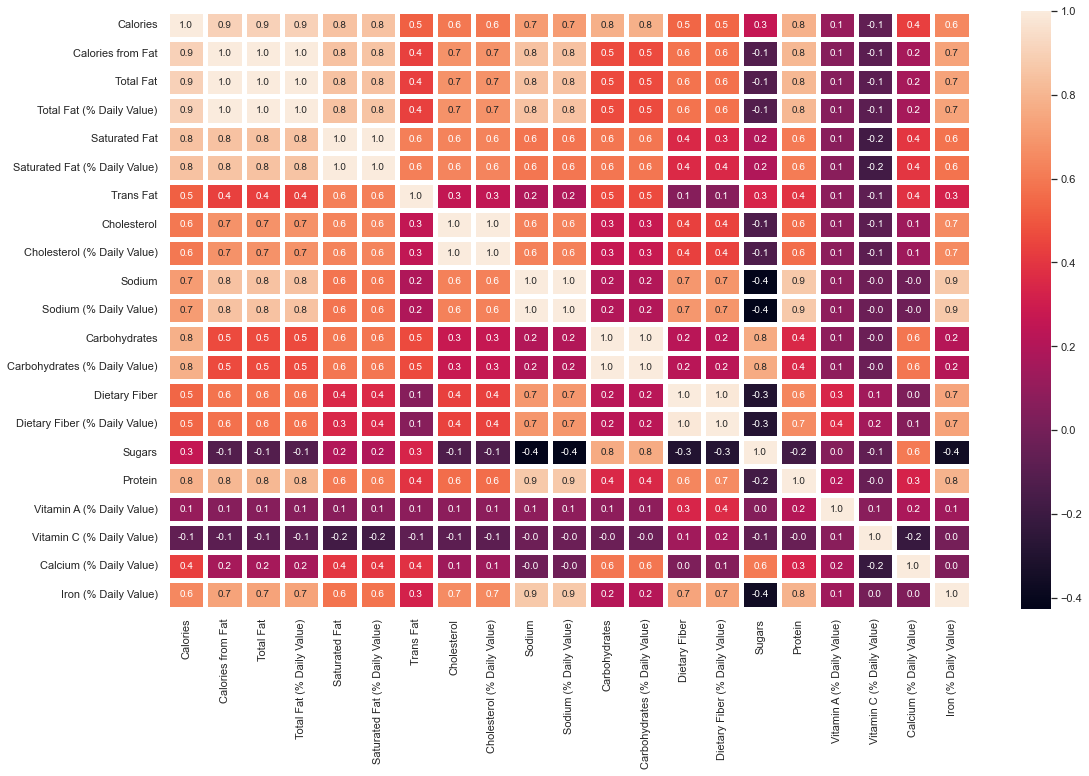

In [82]:
f,ax=plt.subplots(figsize=(18,11))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)

In [ ]:
# Q4 - Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?
# Ans - The "Breakfast" category contributes to the maximum % of Cholesterol in a diet (% daily value)

In [104]:
df.groupby(['Category'])['Cholesterol (% Daily Value)'].sum().sort_values(ascending=False).head()

Category
Breakfast             2140
Coffee & Tea           891
Chicken & Fish         681
Beef & Pork            434
Smoothies & Shakes     412
Name: Cholesterol (% Daily Value), dtype: int64

In [ ]:
# Q5 - Which item contributes maximum to the Sodium intake?
# Ans - The "Chicken McNuggets" category contributes to the maximum % of Cholesterol in a diet (% daily value)

In [120]:
df.groupby(['Item'])['Sodium'].sum().sort_values(ascending=False).head()

Item
Chicken McNuggets (40 piece)                                    3600
Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)      2290
Big Breakfast with Hotcakes (Large Biscuit)                     2260
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)    2170
Big Breakfast with Hotcakes (Regular Biscuit)                   2150
Name: Sodium, dtype: int64

In [ ]:
# Which 4 food items contain the most amount of Saturated Fat?
# Ans - Following Items contains the most amount of Saturated Fat

In [121]:
df.groupby(['Item'])['Saturated Fat'].sum().sort_values(ascending=False).head()

Item
McFlurry with M&M’s Candies (Medium)           20.0
Big Breakfast with Hotcakes (Large Biscuit)    20.0
Chicken McNuggets (40 piece)                   20.0
Frappé Chocolate Chip (Large)                  20.0
Double Quarter Pounder with Cheese             19.0
Name: Saturated Fat, dtype: float64